# STAT Group 20 Project Proposal



<br>Alan Zhang 
<br>Sneh Agarwal
<br>Taniya Cai
<br>Waxin Luo

## Introduction

Recently, bike-sharing systems have increased in popularity as a means of efficient transportation in urban areas. With bike-sharing systems, users are able to rent a bicycle from a small depot close to the staring location, and return it at another depot, close to the user's destination. The ubiquity of such programs has therefore generated investigation and analysis of quantifiable data for further effectiveness. Capital Bikeshare is one such bike-sharing system, that serves the Washington D.C. metropolitan area, and publishes yearly anonymized statistics, including the daily usage times.

One particular parameter of interest is the normalized frequency of users during different temperatures and days for bike-sharing systems. This would gauge demand, and so would be useful for possible seasonal or monthly availability decisions.

### Preliminary Results

In [16]:
library(repr)
library(tidyverse)
library(dplyr)
library(grid)

The first step is to download the dataset zip file from the website, unzip the files, and load the dataset into R. We name the dataset as bike.

In [11]:
dir.create("data")
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
download.file(url,"data/Bike-Sharing-Dataset.zip")
unzip("data/Bike-Sharing-Dataset.zip", files="day.csv", exdir="data/")
bike <- read_csv("data/day.csv") 
head(bike)
print("Table 1")

Warning message in dir.create("data"):
“'data' already exists”
Rows: 731 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): instant, season, yr, mnth, holiday, weekday, workingday, weathers...
date  (1): dteday


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


[1] "Table 1"


The table 1 is the fist 6 rows of the dataset. Then we select the columns required for our analysis.

In [12]:
bike <- bike %>%
 select(season, cnt)
print("Table 2")
head(bike)

[1] "Table 2"


season,cnt
<dbl>,<dbl>
1,985
1,801
1,1349
1,1562
1,1600
1,1606


In the table 2, we notice that Season is a numerical variable here, so we need to change it to categorical variable.

In [13]:
bike$season <- as.factor(bike$season)

In order to campare the distribution of the count of rental bikes for four different seasons, we plot the side-by-side boxplot here.

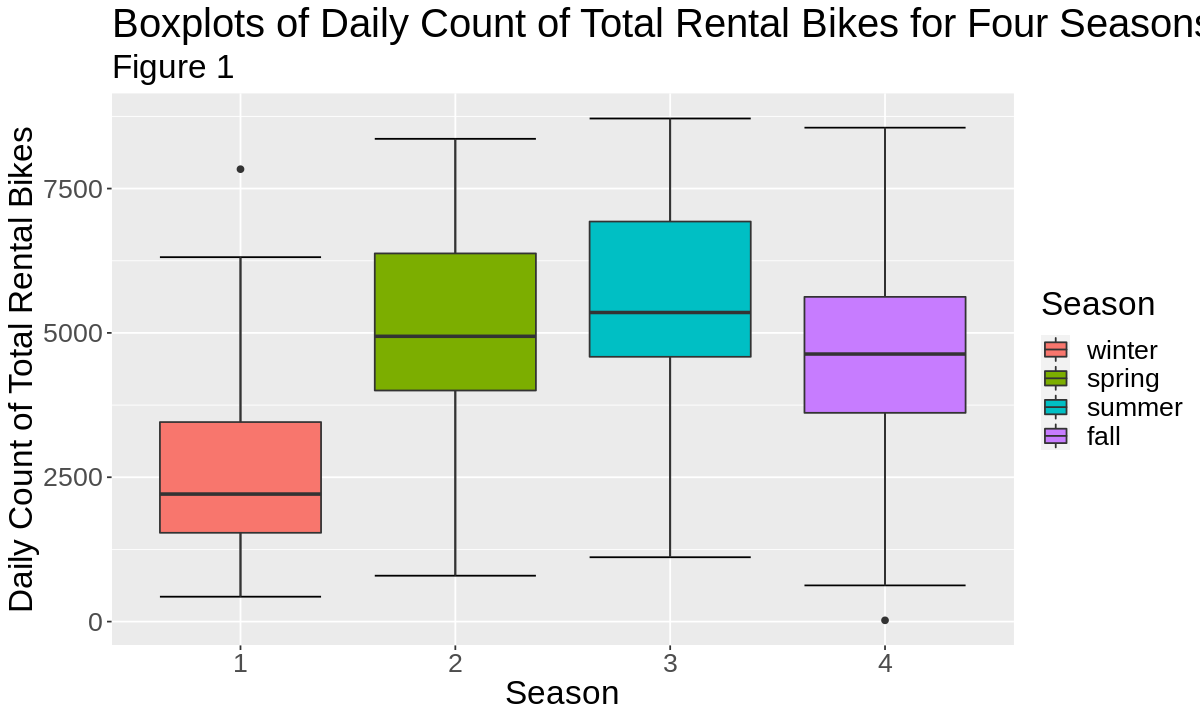

In [14]:
boxplots <- bike %>%  
          ggplot(aes(x = season, y = cnt, fill = season)) + 
          stat_boxplot(geom ='errorbar') + 
          geom_boxplot() + 
          labs(x = "Season", y = "Daily Count of Total Rental Bikes", 
               title = "Boxplots of Daily Count of Total Rental Bikes for Four Seasons",
               subtitle = "Figure 1") +
          theme(text = element_text(size=20)) +
          scale_fill_discrete(name = "Season", labels = c("winter", "spring", "summer", "fall"))
options(repr.plot.height = 6, repr.plot.width = 10)
boxplots

In [15]:
bike_summary <- bike %>% 
     group_by(season) %>% 
     summarize(n = n(), Average_Count = mean(cnt), Median_Count = median(cnt), Standard_Dev = sd(cnt),
               IQR = quantile(cnt, 0.75) - quantile(cnt, 0.25), min = min(cnt), max = max(cnt))
print("Table 4")
bike_summary

[1] "Table 4"


season,n,Average_Count,Median_Count,Standard_Dev,IQR,min,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,181,2604.133,2209.0,1399.942,1918.00,431,7836
2,184,4992.332,4941.5,1695.977,2374.00,795,8362
3,188,5644.303,5353.5,1459.800,2342.75,1115,8714
4,178,4728.163,4634.5,1699.615,2009.00,22,8555


The Table 4 provides an exhaustive list of summary statistics of the daily cont for four seasons to help us to have a better understanding of the datasets. We included Number of Data Points, Median of Daily Count, Mean of Daily Count, Standard Deviation Daily Count, Interquartile Range of Daily Count (0.25 Quartile ~ 0.75 Quartile), Minimum Daily Count, Maximum Daily Count.

### Methods: Plan

The report on the "bike" dataset is clean and wrangled which makes it easy to understand. The report uses only selected columns, 'season' and 'cnt' to give a generalized idea about the effect all factors as season is an overall generalized variable. Preliminary analysis on that data is conducted for a number of parameters which gives in-depth information about the data collected. Further, the report and analysis conducted is reproducible and hence trustworthy.

Our dataset only includes bike-sharing data from the metro area of Washington DC. We will treat this data as a sample and use it to predict the 'Average Count' of bikes rented during different temperature ranges around the world. We will use bootstrapping to approach this question and perform our analysis. We will also display the change in the bootstrapping distribution as the sample size increases using asymptotic analysis.

The plot produced is not enough as it shows the difference in average bikes rented during different seasons in metro Washington DC using box-plots. We will investigate specific factors like temperature and use histograms, gradually increasing the sample size taken, to display the asymptotic affect and correctly predict the parameter of interest, i.e. 'Average Count' at different temperatures. For hypothesis testing , we will use 'average count' as our parameter. We will try to estimate using a 95% confidence interval.

**What do you expect to find?**
- The normalized frequency of bike rentals as a consequence of date and time, to be applicable to the greater United States and the world.

**What impact could such findings have?**
- Increase in availability of bikes at temperatures when demand of bikes rented is high.
- Determining the traffic level given temperatures during a day.
- Initiating bike-sharing system in countries where its beneficial given year-round temperature ranges.

**What future questions could this lead to?**
- Does the same season have the same affect to the number of bikes rented during a day across the United States?
- How can we maximize the number of bikes rented during a day?

### References